In [ ]:
import os
root_path = '/raid/ee-mariyam/maryam/abhijeet/Combined_Files'
def get_jpg_paths(base_dir):
    jpg_dict = {}
    
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            jpg_paths = []
            
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith('.jpg'):
                    file_path = os.path.join(folder_path, file_name)
                    jpg_paths.append(file_path)
            
            if jpg_paths:
                jpg_dict[folder_name] = jpg_paths
    
    return jpg_dict

combined_files_path = root_path
jpg_paths_dict = get_jpg_paths(combined_files_path)


In [18]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F 
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [19]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
def evaluate_model(model, val_loader):
    model.eval()
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    return all_labels, all_preds



In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, num_classes, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
def plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies):

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='green')
    plt.plot(val_accuracies, label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classwise_accuracy(cm, jpg_paths_dict):
    total_accuracy = np.trace(cm) / np.sum(cm)

    classwise_accuracy = cm.diagonal() / cm.sum(axis=1)

    class_names = list(jpg_paths_dict.keys())  
    classwise_accuracy = [
        acc if cm.sum(axis=1)[i] > 0 else np.nan
        for i, acc in enumerate(classwise_accuracy)
    ]

    print(f"Total Accuracy: {total_accuracy * 100:.2f}%")
    for i, accuracy in enumerate(classwise_accuracy):
        if np.isnan(accuracy):
            print(f"Class '{class_names[i]}' Accuracy: N/A (no samples)")
        else:
            print(f"Class '{class_names[i]}' Accuracy: {accuracy * 100:.2f}%")


    plt.figure(figsize=(10, 6))
    plt.bar(class_names, classwise_accuracy, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 1) 
    plt.axhline(total_accuracy, color='red', linestyle='--', label='Total Accuracy')
    plt.xticks(rotation=45)  
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout() 
    plt.show()

In [25]:
jpg_paths_comb_dict = jpg_paths_dict.copy()
anthra = jpg_paths_comb_dict['Anthracnose']
twist = jpg_paths_comb_dict['Twister']
antra_twist = anthra+twist
jpg_paths_comb_dict['Antracnose_Twister'] = antra_twist

jpg_paths_comb_dict.pop('Anthracnose', None)
jpg_paths_comb_dict.pop('Twister', None)


['/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3185.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3244.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6556.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094620957.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6553.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094709204.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3270.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 17.11.2023 DSC_6919.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 06.10.2023 IMG_20231006_163321~2.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 07.10.2023 IMG20231007113350.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S 

In [26]:
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    print(f"Subfolder: {subfolder}")
    print(f"Number of JPEG files: {len(jpg_files)}")
    print()

Subfolder: Purple_Blotch
Number of JPEG files: 406

Subfolder: Thrips
Number of JPEG files: 546

Subfolder: IYSV
Number of JPEG files: 754

Subfolder: Healthy
Number of JPEG files: 1072

Subfolder: Bulb Rot
Number of JPEG files: 669

Subfolder: Basal_Rot
Number of JPEG files: 140

Subfolder: Stemphylium
Number of JPEG files: 661

Subfolder: Antracnose_Twister
Number of JPEG files: 1082



In [ ]:

from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, jpg_files_dict, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._prepare_data(jpg_files_dict)

        self.default_transform = transforms.Compose([
            transforms.ToTensor(), 
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
        ])

    def _prepare_data(self, jpg_files_dict):
        for label_idx, (subfolder, file_paths) in enumerate(jpg_files_dict.items()):
            self.label_map[subfolder] = label_idx
            for file_path in file_paths:
                self.image_paths.append(file_path)
                self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, IOError) as e:
            print(f'Error loading image {img_path}: {e}')
            image = Image.new('RGB', (224, 224)) 
            label = self.labels[idx]
        else:
            label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


In [ ]:
from PIL import Image
import numpy as np
import cv2

class BalancedDataset(CustomImageDataset):
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is None or image.size == 0:
                raise ValueError("Invalid image")
        except Exception:
            image = np.zeros((224, 224, 3), dtype=np.uint8) 

        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class DenseNet121WithCBAMandMLP(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.base = models.densenet121(pretrained=True)
        self.features = self.base.features
        
        self.cbam1 = CBAM(1024)
        self.cbam2 = CBAM(1024)
        
        self.mlp = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        features = self.features(x)                  
        features = self.cbam1(features)
        features = F.relu(features)
        features = self.cbam2(features)
        
        out = F.adaptive_avg_pool2d(features, (1, 1)) 
        out = torch.flatten(out, 1)                   
        return self.mlp(out)                        


In [ ]:
class CBAM(nn.Module):
    def __init__(self, channels, reduction_ratio=16):
        super().__init__()
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels//reduction_ratio, 1),
            nn.ReLU(),
            nn.Conv2d(channels//reduction_ratio, channels, 1),
            nn.Sigmoid()
        )
        
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(channels, 1, 7, padding=3),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        channel = self.channel_attention(x)
        x = x * channel
        spatial = self.spatial_attention(x)
        return x * spatial


In [ ]:
import numpy as np
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import StratifiedKFold

dataset = BalancedDataset(jpg_files_dict=jpg_paths_comb_dict, transform=transform)

labels = np.array(dataset.labels)

num_total = len(dataset)
num_train_val = int(0.8 * num_total)
num_test = num_total - num_train_val
indices = np.arange(num_total)
np.random.seed(42)
np.random.shuffle(indices)

train_val_indices = indices[:num_train_val]
test_indices = indices[num_train_val:]

train_val_labels = labels[train_val_indices]
test_labels = labels[test_indices]
train_val_dataset = Subset(dataset, train_val_indices)
test_dataset = Subset(dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=64)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        log_probs = F.log_softmax(inputs, dim=1)
        probs = torch.exp(log_probs)
        
        targets = targets.view(-1, 1)
        log_pt = log_probs.gather(1, targets).squeeze(1)
        pt = log_pt.exp()

        if self.alpha is not None:
            if self.alpha.type() != inputs.data.type():
                self.alpha = self.alpha.to(inputs.device)
            at = self.alpha.gather(0, targets.squeeze())
            log_pt = log_pt * at

        loss = -((1 - pt) ** self.gamma) * log_pt

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        return loss


In [ ]:
class_counts = torch.bincount(torch.tensor(dataset.labels)).float()
inv_freq = 1.0 / class_counts
alpha = inv_freq / inv_freq.sum()  
alpha = alpha.clamp(min=0.05)    
criterion = FocalLoss(alpha=alpha.to(device), gamma=2.0)


In [32]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=5, fold=None, save_dir='./Models', final=False):
    best_acc = 0.0
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = corrects / total

        model.eval()
        val_running_loss = 0.0
        val_corrects = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_corrects += (predicted == labels).sum().item()

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_corrects / val_total

        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        train_accuracies.append(epoch_acc)
        val_accuracies.append(val_acc)

        print(f'Epoch {epoch + 1}/{num_epochs} '
              f'Train Loss: {epoch_loss:.4f} Train Accuracy: {epoch_acc:.4f} '
              f'Val Loss: {val_loss:.4f} Val Accuracy: {val_acc:.4f}')

        if not final and val_acc > best_acc:
            best_acc = val_acc
            save_path = f'{save_dir}/model_fold_focal_{fold}.pth'
            torch.save(model.state_dict(), save_path)
            print(f'Saved best model for fold {fold} with accuracy: {best_acc:.4f}')

    if final:
        save_path = f'{save_dir}/final_model_focal.pth'
        torch.save(model.state_dict(), save_path)
        print(f'Final model saved to {save_path}')
    else:
        print(f'Best Validation Accuracy for fold {fold}: {best_acc:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies, (best_acc if not final else None)


In [ ]:
import torch
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
class_names = list(jpg_paths_comb_dict.keys())

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_train_losses = []
fold_val_losses = []
fold_train_accuracies = []
fold_val_accuracies = []
fold_best_accuracies = []

all_true_labels_cv = []
all_pred_labels_cv = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_val_indices, train_val_labels)):
    print(f"\n--- Fold {fold + 1} ---")

    fold_train_dataset = Subset(train_val_dataset, train_idx)
    fold_val_dataset = Subset(train_val_dataset, val_idx)

    train_loader = DataLoader(fold_train_dataset, batch_size=32, shuffle=True, num_workers=64)
    val_loader = DataLoader(fold_val_dataset, batch_size=32, shuffle=False, num_workers=64)

    model = DenseNet121WithCBAMandMLP(num_classes=8).to(device)
    criterion = FocalLoss(alpha=alpha.to(device), gamma=2.0)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    train_losses, val_losses, train_accs, val_accs, best_acc = train_model(
        model, train_loader, val_loader, criterion, optimizer, device,
        num_epochs=20, fold=fold, save_dir='./Models/CV/', final=False
    )

    fold_train_losses.append(train_losses[-1])
    fold_val_losses.append(val_losses[-1])
    fold_train_accuracies.append(train_accs[-1])
    fold_val_accuracies.append(val_accs[-1])
    fold_best_accuracies.append(best_acc)

    model.eval()
    val_true_labels = []
    val_pred_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_true_labels.extend(labels.cpu().numpy())
            val_pred_labels.extend(preds.cpu().numpy())

    all_true_labels_cv.extend(val_true_labels)
    all_pred_labels_cv.extend(val_pred_labels)

print("\n=== Cross Validation Metrics ===")
print(f"Overall CV Accuracy: {accuracy_score(all_true_labels_cv, all_pred_labels_cv):.4f}")
print(classification_report(all_true_labels_cv, all_pred_labels_cv, target_names=class_names))



--- Fold 1 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 0.0817 Train Accuracy: 0.5371 Val Loss: 0.0277 Val Accuracy: 0.8113
Saved best model for fold 0 with accuracy: 0.8113


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.0178 Train Accuracy: 0.8502 Val Loss: 0.0134 Val Accuracy: 0.8945
Saved best model for fold 0 with accuracy: 0.8945


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.0071 Train Accuracy: 0.9270 Val Loss: 0.0159 Val Accuracy: 0.9226
Saved best model for fold 0 with accuracy: 0.9226


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.0041 Train Accuracy: 0.9572 Val Loss: 0.0155 Val Accuracy: 0.9367
Saved best model for fold 0 with accuracy: 0.9367


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Exception ignored in: <function _ConnectionBase.__del__ at 0x7f6545da0b80>
Traceback (most recent call last):
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet_py311/lib/python3.11/multiprocessing/connection.py", line 133, in __del__
Traceback (most recent call last):
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet_py311/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet_py311/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet_py311/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
    self._close()
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet_py311/lib/python3.11/multiprocessing/connection.py", line 377, in 

Epoch 5/20 Train Loss: 0.0018 Train Accuracy: 0.9850 Val Loss: 0.0165 Val Accuracy: 0.9379
Saved best model for fold 0 with accuracy: 0.9379


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0017 Train Accuracy: 0.9830 Val Loss: 0.0212 Val Accuracy: 0.9250


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0014 Train Accuracy: 0.9815 Val Loss: 0.0156 Val Accuracy: 0.9355


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0013 Train Accuracy: 0.9856 Val Loss: 0.0145 Val Accuracy: 0.9367


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0010 Train Accuracy: 0.9906 Val Loss: 0.0152 Val Accuracy: 0.9449
Saved best model for fold 0 with accuracy: 0.9449


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0011 Train Accuracy: 0.9886 Val Loss: 0.0190 Val Accuracy: 0.9484
Saved best model for fold 0 with accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0004 Train Accuracy: 0.9950 Val Loss: 0.0165 Val Accuracy: 0.9508
Saved best model for fold 0 with accuracy: 0.9508


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0003 Train Accuracy: 0.9968 Val Loss: 0.0164 Val Accuracy: 0.9402


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0009 Train Accuracy: 0.9930 Val Loss: 0.0256 Val Accuracy: 0.9308


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0008 Train Accuracy: 0.9930 Val Loss: 0.0171 Val Accuracy: 0.9156


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0012 Train Accuracy: 0.9853 Val Loss: 0.0160 Val Accuracy: 0.9297


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0014 Train Accuracy: 0.9856 Val Loss: 0.0152 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0006 Train Accuracy: 0.9959 Val Loss: 0.0153 Val Accuracy: 0.9355


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0012 Train Accuracy: 0.9897 Val Loss: 0.0155 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0010 Train Accuracy: 0.9915 Val Loss: 0.0142 Val Accuracy: 0.9332


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0022 Train Accuracy: 0.9795 Val Loss: 0.0196 Val Accuracy: 0.9297
Best Validation Accuracy for fold 0: 0.9508


Corrupt JPEG data: premature end of data segment



--- Fold 2 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 0.0796 Train Accuracy: 0.5646 Val Loss: 0.0285 Val Accuracy: 0.8523
Saved best model for fold 1 with accuracy: 0.8523


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.0162 Train Accuracy: 0.8525 Val Loss: 0.0107 Val Accuracy: 0.8851
Saved best model for fold 1 with accuracy: 0.8851


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.0061 Train Accuracy: 0.9408 Val Loss: 0.0080 Val Accuracy: 0.9285
Saved best model for fold 1 with accuracy: 0.9285


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.0030 Train Accuracy: 0.9716 Val Loss: 0.0100 Val Accuracy: 0.9449
Saved best model for fold 1 with accuracy: 0.9449


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0016 Train Accuracy: 0.9824 Val Loss: 0.0132 Val Accuracy: 0.9308


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0022 Train Accuracy: 0.9792 Val Loss: 0.0169 Val Accuracy: 0.9332


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0015 Train Accuracy: 0.9848 Val Loss: 0.0102 Val Accuracy: 0.9484
Saved best model for fold 1 with accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0022 Train Accuracy: 0.9795 Val Loss: 0.0206 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0007 Train Accuracy: 0.9927 Val Loss: 0.0109 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0003 Train Accuracy: 0.9974 Val Loss: 0.0144 Val Accuracy: 0.9601
Saved best model for fold 1 with accuracy: 0.9601


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0019 Train Accuracy: 0.9868 Val Loss: 0.0284 Val Accuracy: 0.8640


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0028 Train Accuracy: 0.9730 Val Loss: 0.0137 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0011 Train Accuracy: 0.9883 Val Loss: 0.0107 Val Accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0006 Train Accuracy: 0.9918 Val Loss: 0.0115 Val Accuracy: 0.9519


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0002 Train Accuracy: 0.9982 Val Loss: 0.0097 Val Accuracy: 0.9566


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0001 Train Accuracy: 0.9988 Val Loss: 0.0118 Val Accuracy: 0.9590


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0002 Train Accuracy: 0.9979 Val Loss: 0.0134 Val Accuracy: 0.9437


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0005 Train Accuracy: 0.9956 Val Loss: 0.0164 Val Accuracy: 0.9437


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0003 Train Accuracy: 0.9968 Val Loss: 0.0127 Val Accuracy: 0.9519


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0007 Train Accuracy: 0.9944 Val Loss: 0.0129 Val Accuracy: 0.9343
Best Validation Accuracy for fold 1: 0.9601


Corrupt JPEG data: premature end of data segment



--- Fold 3 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 0.0799 Train Accuracy: 0.5526 Val Loss: 0.0219 Val Accuracy: 0.8640
Saved best model for fold 2 with accuracy: 0.8640


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.0171 Train Accuracy: 0.8593 Val Loss: 0.0116 Val Accuracy: 0.9062
Saved best model for fold 2 with accuracy: 0.9062


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.0067 Train Accuracy: 0.9387 Val Loss: 0.0098 Val Accuracy: 0.9191
Saved best model for fold 2 with accuracy: 0.9191


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.0029 Train Accuracy: 0.9698 Val Loss: 0.0099 Val Accuracy: 0.9426
Saved best model for fold 2 with accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0018 Train Accuracy: 0.9830 Val Loss: 0.0097 Val Accuracy: 0.9472
Saved best model for fold 2 with accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0013 Train Accuracy: 0.9897 Val Loss: 0.0102 Val Accuracy: 0.9379


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0011 Train Accuracy: 0.9892 Val Loss: 0.0111 Val Accuracy: 0.9426


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0006 Train Accuracy: 0.9938 Val Loss: 0.0102 Val Accuracy: 0.9402


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0004 Train Accuracy: 0.9956 Val Loss: 0.0116 Val Accuracy: 0.9496
Saved best model for fold 2 with accuracy: 0.9496


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0002 Train Accuracy: 0.9985 Val Loss: 0.0107 Val Accuracy: 0.9590
Saved best model for fold 2 with accuracy: 0.9590


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0001 Train Accuracy: 0.9988 Val Loss: 0.0108 Val Accuracy: 0.9543


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0046 Train Accuracy: 0.9616 Val Loss: 0.0088 Val Accuracy: 0.9297


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0036 Train Accuracy: 0.9619 Val Loss: 0.0106 Val Accuracy: 0.9285


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0008 Train Accuracy: 0.9912 Val Loss: 0.0066 Val Accuracy: 0.9531


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0004 Train Accuracy: 0.9968 Val Loss: 0.0076 Val Accuracy: 0.9519


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0002 Train Accuracy: 0.9977 Val Loss: 0.0082 Val Accuracy: 0.9461


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0010 Train Accuracy: 0.9886 Val Loss: 0.0133 Val Accuracy: 0.9367


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0004 Train Accuracy: 0.9971 Val Loss: 0.0096 Val Accuracy: 0.9531


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0004 Train Accuracy: 0.9974 Val Loss: 0.0104 Val Accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0008 Train Accuracy: 0.9906 Val Loss: 0.0113 Val Accuracy: 0.9426
Best Validation Accuracy for fold 2: 0.9590


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment



--- Fold 4 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 0.0800 Train Accuracy: 0.6133 Val Loss: 0.0265 Val Accuracy: 0.8171
Saved best model for fold 3 with accuracy: 0.8171


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.0172 Train Accuracy: 0.8511 Val Loss: 0.0158 Val Accuracy: 0.8581
Saved best model for fold 3 with accuracy: 0.8581


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.0076 Train Accuracy: 0.9293 Val Loss: 0.0170 Val Accuracy: 0.8710
Saved best model for fold 3 with accuracy: 0.8710


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.0037 Train Accuracy: 0.9549 Val Loss: 0.0153 Val Accuracy: 0.9203
Saved best model for fold 3 with accuracy: 0.9203


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0026 Train Accuracy: 0.9774 Val Loss: 0.0164 Val Accuracy: 0.9109


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0015 Train Accuracy: 0.9842 Val Loss: 0.0140 Val Accuracy: 0.9355
Saved best model for fold 3 with accuracy: 0.9355


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0011 Train Accuracy: 0.9880 Val Loss: 0.0237 Val Accuracy: 0.9320


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0009 Train Accuracy: 0.9903 Val Loss: 0.0221 Val Accuracy: 0.9226


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0005 Train Accuracy: 0.9944 Val Loss: 0.0178 Val Accuracy: 0.9332


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0004 Train Accuracy: 0.9959 Val Loss: 0.0222 Val Accuracy: 0.9297


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0008 Train Accuracy: 0.9912 Val Loss: 0.0214 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0007 Train Accuracy: 0.9924 Val Loss: 0.0199 Val Accuracy: 0.9179


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0010 Train Accuracy: 0.9892 Val Loss: 0.0250 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0022 Train Accuracy: 0.9801 Val Loss: 0.0191 Val Accuracy: 0.9168


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0013 Train Accuracy: 0.9880 Val Loss: 0.0237 Val Accuracy: 0.9179


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0022 Train Accuracy: 0.9792 Val Loss: 0.0213 Val Accuracy: 0.9168


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0038 Train Accuracy: 0.9689 Val Loss: 0.0135 Val Accuracy: 0.9379
Saved best model for fold 3 with accuracy: 0.9379


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0010 Train Accuracy: 0.9906 Val Loss: 0.0217 Val Accuracy: 0.9203


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0011 Train Accuracy: 0.9897 Val Loss: 0.0185 Val Accuracy: 0.9273


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0006 Train Accuracy: 0.9930 Val Loss: 0.0170 Val Accuracy: 0.9250
Best Validation Accuracy for fold 3: 0.9379

--- Fold 5 ---


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/20 Train Loss: 0.0882 Train Accuracy: 0.4701 Val Loss: 0.0395 Val Accuracy: 0.8474
Saved best model for fold 4 with accuracy: 0.8474


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/20 Train Loss: 0.0251 Train Accuracy: 0.8491 Val Loss: 0.0148 Val Accuracy: 0.8439


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/20 Train Loss: 0.0062 Train Accuracy: 0.9420 Val Loss: 0.0105 Val Accuracy: 0.9378
Saved best model for fold 4 with accuracy: 0.9378


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/20 Train Loss: 0.0027 Train Accuracy: 0.9748 Val Loss: 0.0090 Val Accuracy: 0.9401
Saved best model for fold 4 with accuracy: 0.9401


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/20 Train Loss: 0.0016 Train Accuracy: 0.9845 Val Loss: 0.0184 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/20 Train Loss: 0.0016 Train Accuracy: 0.9851 Val Loss: 0.0140 Val Accuracy: 0.9319


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/20 Train Loss: 0.0010 Train Accuracy: 0.9894 Val Loss: 0.0181 Val Accuracy: 0.9390


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/20 Train Loss: 0.0019 Train Accuracy: 0.9804 Val Loss: 0.0139 Val Accuracy: 0.9284


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/20 Train Loss: 0.0014 Train Accuracy: 0.9889 Val Loss: 0.0160 Val Accuracy: 0.9143


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/20 Train Loss: 0.0009 Train Accuracy: 0.9906 Val Loss: 0.0136 Val Accuracy: 0.9484
Saved best model for fold 4 with accuracy: 0.9484


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/20 Train Loss: 0.0026 Train Accuracy: 0.9763 Val Loss: 0.0096 Val Accuracy: 0.9425


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/20 Train Loss: 0.0008 Train Accuracy: 0.9892 Val Loss: 0.0125 Val Accuracy: 0.9531
Saved best model for fold 4 with accuracy: 0.9531


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/20 Train Loss: 0.0006 Train Accuracy: 0.9936 Val Loss: 0.0119 Val Accuracy: 0.9472


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/20 Train Loss: 0.0003 Train Accuracy: 0.9977 Val Loss: 0.0181 Val Accuracy: 0.9460


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/20 Train Loss: 0.0010 Train Accuracy: 0.9900 Val Loss: 0.0118 Val Accuracy: 0.9390


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/20 Train Loss: 0.0009 Train Accuracy: 0.9877 Val Loss: 0.0139 Val Accuracy: 0.9448


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/20 Train Loss: 0.0008 Train Accuracy: 0.9912 Val Loss: 0.0193 Val Accuracy: 0.9354


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/20 Train Loss: 0.0004 Train Accuracy: 0.9944 Val Loss: 0.0232 Val Accuracy: 0.9448


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/20 Train Loss: 0.0002 Train Accuracy: 0.9985 Val Loss: 0.0185 Val Accuracy: 0.9425


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/20 Train Loss: 0.0004 Train Accuracy: 0.9956 Val Loss: 0.0221 Val Accuracy: 0.9296
Best Validation Accuracy for fold 4: 0.9531

=== Cross Validation Metrics ===
Overall CV Accuracy: 0.9322
                    precision    recall  f1-score   support

     Purple_Blotch       0.78      0.79      0.78       337
            Thrips       0.98      0.99      0.99       443
              IYSV       0.99      1.00      0.99       614
           Healthy       0.96      0.99      0.98       851
          Bulb Rot       1.00      1.00      1.00       509
         Basal_Rot       0.70      0.71      0.71       105
       Stemphylium       0.83      0.84      0.83       536
Antracnose_Twister       0.95      0.90      0.92       869

          accuracy                           0.93      4264
         macro avg       0.90      0.90      0.90      4264
      weighted avg       0.93      0.93      0.93      4264



In [39]:
import numpy as np

print("\n=== 5-Fold Cross Validation Summary ===")
print(f"Average Train Accuracy: {np.mean(fold_train_accuracies):.4f} ± {np.std(fold_train_accuracies):.4f}")
print(f"Average Val Accuracy:   {np.mean(fold_val_accuracies):.4f} ± {np.std(fold_val_accuracies):.4f}")
print(f"Average Train Loss:     {np.mean(fold_train_losses):.4f} ± {np.std(fold_train_losses):.4f}")
print(f"Average Val Loss:       {np.mean(fold_val_losses):.4f} ± {np.std(fold_val_losses):.4f}")



=== 5-Fold Cross Validation Summary ===
Average Train Accuracy: 0.9906 ± 0.0058
Average Val Accuracy:   0.9322 ± 0.0060
Average Train Loss:     0.0009 ± 0.0007
Average Val Loss:       0.0166 ± 0.0040


In [ ]:
import torch
import time
import copy
import os

def train_model_v2(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=5, fold=None, save_dir='./Models', final=False):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 30)

        model.train()
        running_loss = 0.0
        running_corrects = 0
        total = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = running_corrects.double() / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        if val_loader is not None:
            model.eval()
            val_loss = 0.0
            val_corrects = 0
            val_total = 0

            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)
                    val_loss += loss.item() * inputs.size(0)
                    val_corrects += torch.sum(preds == labels.data)
                    val_total += labels.size(0)

            epoch_val_loss = val_loss / val_total
            epoch_val_acc = val_corrects.double() / val_total
            val_losses.append(epoch_val_loss)
            val_accuracies.append(epoch_val_acc.item())

            print(f'Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')

            if not final and epoch_val_acc > best_acc:
                best_acc = epoch_val_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                os.makedirs(save_dir, exist_ok=True)
                save_path = os.path.join(save_dir, f'model_fold_focal_{fold}.pth')
                torch.save(best_model_wts, save_path)
                print(f'--> Best model saved for fold {fold} with acc {best_acc:.4f}')
        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    if final:
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, 'final_model_focal.pth')
        torch.save(model.state_dict(), save_path)
        print(f'Final model saved to {save_path}')
    elif best_acc > 0.0:
        model.load_state_dict(best_model_wts)
        print(f'Loaded best model weights with acc: {best_acc:.4f}')
        return train_losses, val_losses, train_accuracies, val_accuracies, best_acc
    else:
        print(f'No validation provided. Final training metrics only.')

    return train_losses, val_losses, train_accuracies, val_accuracies

Epoch 1/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0724 Acc: 0.5689

Epoch 2/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0122 Acc: 0.8900

Epoch 3/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0060 Acc: 0.9390

Epoch 4/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0029 Acc: 0.9707

Epoch 5/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0031 Acc: 0.9693

Epoch 6/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0032 Acc: 0.9686

Epoch 7/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0020 Acc: 0.9791

Epoch 8/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0010 Acc: 0.9902

Epoch 9/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0007 Acc: 0.9939

Epoch 10/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0020 Acc: 0.9815

Epoch 11/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0005 Acc: 0.9941

Epoch 12/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0007 Acc: 0.9932

Epoch 13/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0002 Acc: 0.9977

Epoch 14/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0004 Acc: 0.9981

Epoch 15/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0044 Acc: 0.9597

Epoch 16/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0008 Acc: 0.9925

Epoch 17/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0012 Acc: 0.9955

Epoch 18/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0004 Acc: 0.9965

Epoch 19/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0003 Acc: 0.9967

Epoch 20/20
------------------------------


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Train Loss: 0.0001 Acc: 0.9981

Training complete in 25m 50s
Final model saved to ./Models/final_model_focal.pth
Saved final model to ./Models/final_model.pth


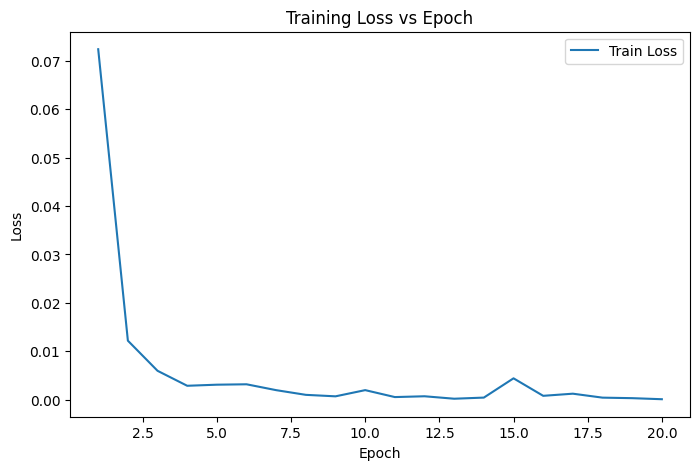

In [ ]:
import matplotlib.pyplot as plt
import os

full_train_loader = DataLoader(train_val_dataset, batch_size=32, shuffle=True, num_workers=64)

final_model = DenseNet121WithCBAMandMLP(num_classes=8).to(device)
criterion = FocalLoss(alpha=alpha.to(device), gamma=2.0)
optimizer = torch.optim.Adam(final_model.parameters(), lr=1e-4)

train_losses, val_losses, train_accs, val_accs = train_model_v2(
    model=final_model,
    train_loader=full_train_loader,
    val_loader=None,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=20,
    final=True,
    save_dir='./Models'
)


os.makedirs('./Models', exist_ok=True)
torch.save(final_model.state_dict(), './Models/final_model_focal.pth')
print("Saved final model to ./Models/final_model.pth")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.legend()
plt.show()


In [47]:
final_model.eval()
all_true = []
all_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = final_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_true.extend(labels.cpu().numpy())
        all_pred.extend(preds.cpu().numpy())


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Test Accuracy: 0.9625

Classification Report:
                    precision    recall  f1-score   support

     Purple_Blotch       0.86      0.88      0.87        69
            Thrips       1.00      1.00      1.00       103
              IYSV       1.00      1.00      1.00       140
           Healthy       1.00      1.00      1.00       221
          Bulb Rot       1.00      1.00      1.00       160
         Basal_Rot       0.83      0.83      0.83        35
       Stemphylium       0.90      0.92      0.91       125
Antracnose_Twister       0.95      0.93      0.94       213

          accuracy                           0.96      1066
         macro avg       0.94      0.94      0.94      1066
      weighted avg       0.96      0.96      0.96      1066



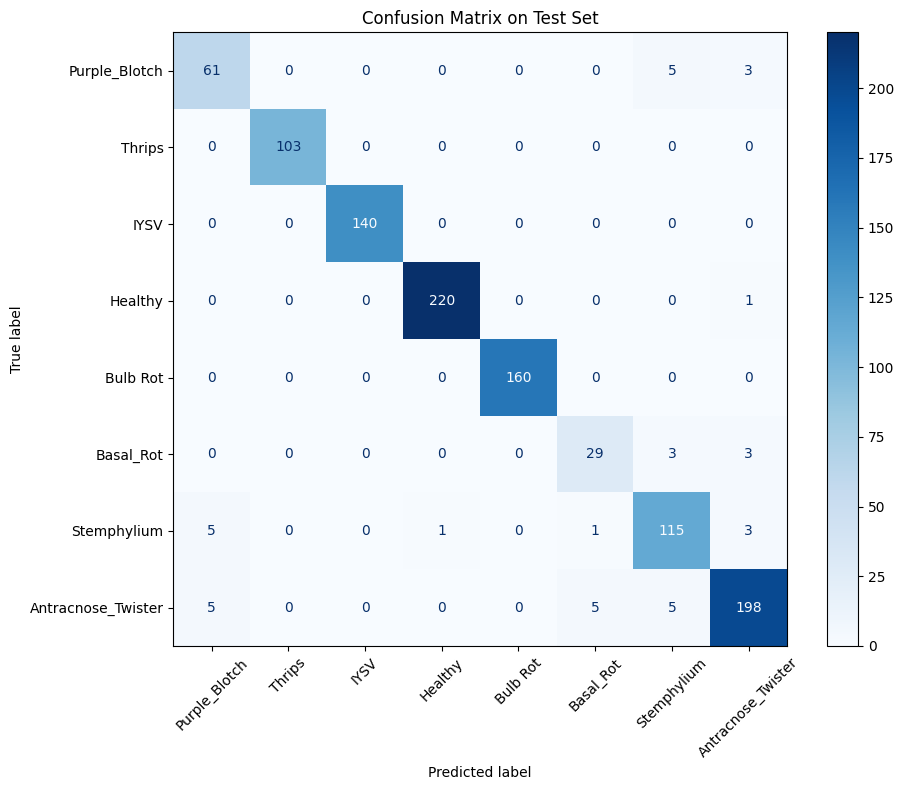

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

acc = accuracy_score(all_true, all_pred)
print(f"Test Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(all_true, all_pred, target_names=dataset.label_map.keys()))

cm = confusion_matrix(all_true, all_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(dataset.label_map.keys()))

fig, ax = plt.subplots(figsize=(10,8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.tight_layout()
plt.show()


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = BalancedDataset(jpg_files_dict=jpg_paths_comb_dict, transform=transform)

In [ ]:

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=64)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=64)

In [ ]:


model = DenseNet121WithCBAM(num_classes=len(jpg_paths_comb_dict)).to(device)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        log_probs = F.log_softmax(inputs, dim=1)
        probs = torch.exp(log_probs)
        
        targets = targets.view(-1, 1)
        log_pt = log_probs.gather(1, targets).squeeze(1)
        pt = log_pt.exp()

        if self.alpha is not None:
            if self.alpha.type() != inputs.data.type():
                self.alpha = self.alpha.to(inputs.device)
            at = self.alpha.gather(0, targets.squeeze())
            log_pt = log_pt * at

        loss = -((1 - pt) ** self.gamma) * log_pt

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        return loss


In [ ]:
class_counts = torch.bincount(torch.tensor(dataset.labels)).float()
inv_freq = 1.0 / class_counts
alpha = inv_freq / inv_freq.sum()  
alpha = alpha.clamp(min=0.05)    
criterion = FocalLoss(alpha=alpha.to(device), gamma=2.0)


In [48]:
print( class_counts)

tensor([ 406.,  546.,  754., 1072.,  669.,  140.,  661., 1082.])


In [ ]:

optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=30)


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 1/30 Train Loss: 0.0406 Train Accuracy: 0.7050 Val Loss: 0.0405 Val Accuracy: 0.7045
Saved best model with accuracy: 0.7045


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 2/30 Train Loss: 0.0210 Train Accuracy: 0.8107 Val Loss: 0.0353 Val Accuracy: 0.6660


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 3/30 Train Loss: 0.0165 Train Accuracy: 0.8389 Val Loss: 0.0366 Val Accuracy: 0.7749
Saved best model with accuracy: 0.7749


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 4/30 Train Loss: 0.0097 Train Accuracy: 0.8830 Val Loss: 0.0149 Val Accuracy: 0.8827
Saved best model with accuracy: 0.8827


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 5/30 Train Loss: 0.0080 Train Accuracy: 0.9055 Val Loss: 0.0346 Val Accuracy: 0.8537


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 6/30 Train Loss: 0.0100 Train Accuracy: 0.8919 Val Loss: 0.0468 Val Accuracy: 0.8283


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 7/30 Train Loss: 0.0092 Train Accuracy: 0.8987 Val Loss: 0.0215 Val Accuracy: 0.8208


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 8/30 Train Loss: 0.0044 Train Accuracy: 0.9444 Val Loss: 0.0200 Val Accuracy: 0.8968
Saved best model with accuracy: 0.8968


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 9/30 Train Loss: 0.0033 Train Accuracy: 0.9613 Val Loss: 0.0146 Val Accuracy: 0.8940


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 10/30 Train Loss: 0.0023 Train Accuracy: 0.9679 Val Loss: 0.0139 Val Accuracy: 0.9212
Saved best model with accuracy: 0.9212


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 11/30 Train Loss: 0.0021 Train Accuracy: 0.9765 Val Loss: 0.1362 Val Accuracy: 0.5319


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 12/30 Train Loss: 0.0207 Train Accuracy: 0.8333 Val Loss: 0.0222 Val Accuracy: 0.8255


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 13/30 Train Loss: 0.0066 Train Accuracy: 0.9207 Val Loss: 0.0121 Val Accuracy: 0.9193


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 14/30 Train Loss: 0.0016 Train Accuracy: 0.9805 Val Loss: 0.0148 Val Accuracy: 0.9203


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 15/30 Train Loss: 0.0009 Train Accuracy: 0.9899 Val Loss: 0.0141 Val Accuracy: 0.9456
Saved best model with accuracy: 0.9456


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 16/30 Train Loss: 0.0008 Train Accuracy: 0.9904 Val Loss: 0.0169 Val Accuracy: 0.9259


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 17/30 Train Loss: 0.0011 Train Accuracy: 0.9883 Val Loss: 0.0147 Val Accuracy: 0.9306


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 18/30 Train Loss: 0.0015 Train Accuracy: 0.9848 Val Loss: 0.0238 Val Accuracy: 0.8593


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 19/30 Train Loss: 0.0078 Train Accuracy: 0.9278 Val Loss: 0.0149 Val Accuracy: 0.8921


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 20/30 Train Loss: 0.0016 Train Accuracy: 0.9791 Val Loss: 0.0169 Val Accuracy: 0.9212


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 21/30 Train Loss: 0.0014 Train Accuracy: 0.9836 Val Loss: 0.0157 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 22/30 Train Loss: 0.0009 Train Accuracy: 0.9892 Val Loss: 0.0140 Val Accuracy: 0.9343


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 23/30 Train Loss: 0.0003 Train Accuracy: 0.9965 Val Loss: 0.0150 Val Accuracy: 0.9390


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 24/30 Train Loss: 0.0006 Train Accuracy: 0.9932 Val Loss: 0.0273 Val Accuracy: 0.9062


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 25/30 Train Loss: 0.0083 Train Accuracy: 0.9261 Val Loss: 0.0433 Val Accuracy: 0.7730


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 26/30 Train Loss: 0.0031 Train Accuracy: 0.9625 Val Loss: 0.0266 Val Accuracy: 0.9034


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 27/30 Train Loss: 0.0022 Train Accuracy: 0.9740 Val Loss: 0.0239 Val Accuracy: 0.9034


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 28/30 Train Loss: 0.0010 Train Accuracy: 0.9880 Val Loss: 0.0298 Val Accuracy: 0.9053


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 29/30 Train Loss: 0.0005 Train Accuracy: 0.9930 Val Loss: 0.0177 Val Accuracy: 0.9334


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


Epoch 30/30 Train Loss: 0.0001 Train Accuracy: 0.9993 Val Loss: 0.0173 Val Accuracy: 0.9418
Training complete.
Best Validation Accuracy: 0.9456


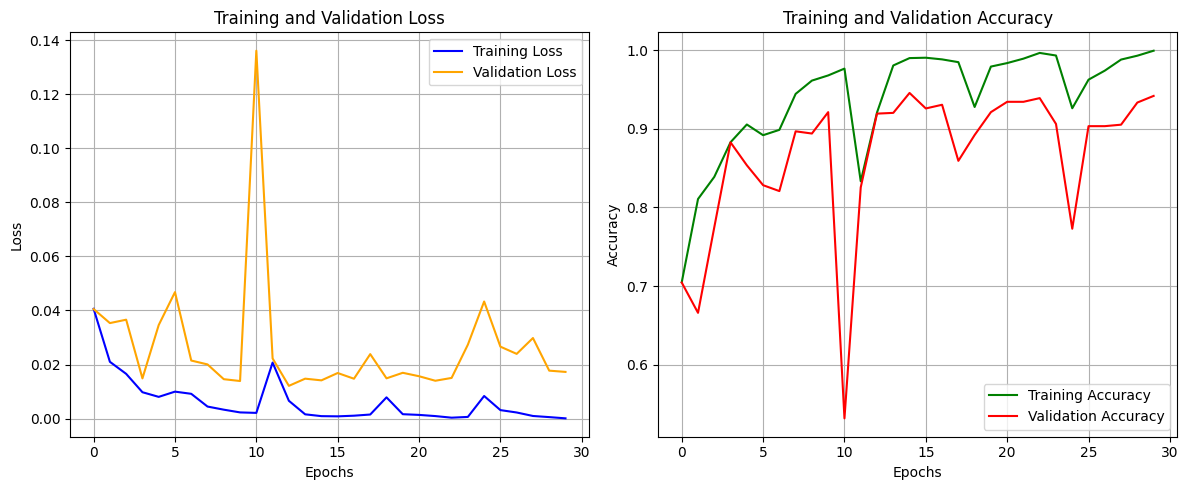

In [ ]:
plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies)

In [ ]:
model.load_state_dict(torch.load('densenet_cbam_no_annotation_focal_loss.pth'))
all_labels, all_preds = evaluate_model(model, val_loader)

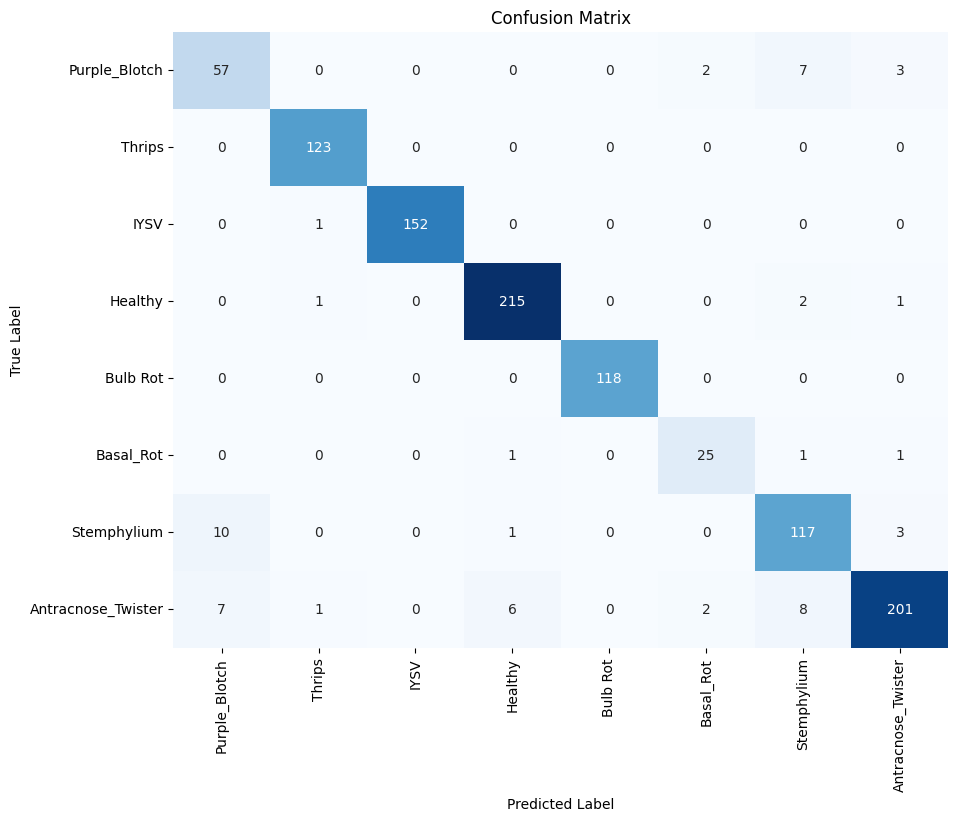

Total Accuracy: 94.56%
Class 'Purple_Blotch' Accuracy: 82.61%
Class 'Thrips' Accuracy: 100.00%
Class 'IYSV' Accuracy: 99.35%
Class 'Healthy' Accuracy: 98.17%
Class 'Bulb Rot' Accuracy: 100.00%
Class 'Basal_Rot' Accuracy: 89.29%
Class 'Stemphylium' Accuracy: 89.31%
Class 'Antracnose_Twister' Accuracy: 89.33%


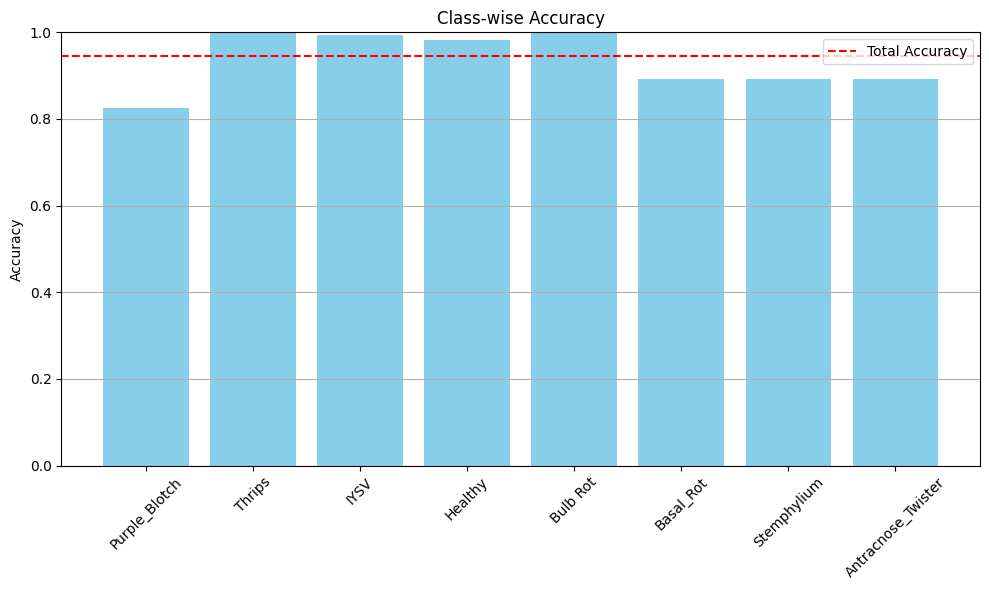

In [ ]:
class_names = list(jpg_paths_comb_dict.keys()) 
cm = confusion_matrix(all_labels, all_preds)
num_classes=len(jpg_paths_comb_dict)
plot_confusion_matrix(cm, num_classes, class_names)
plot_classwise_accuracy(cm, jpg_paths_comb_dict)

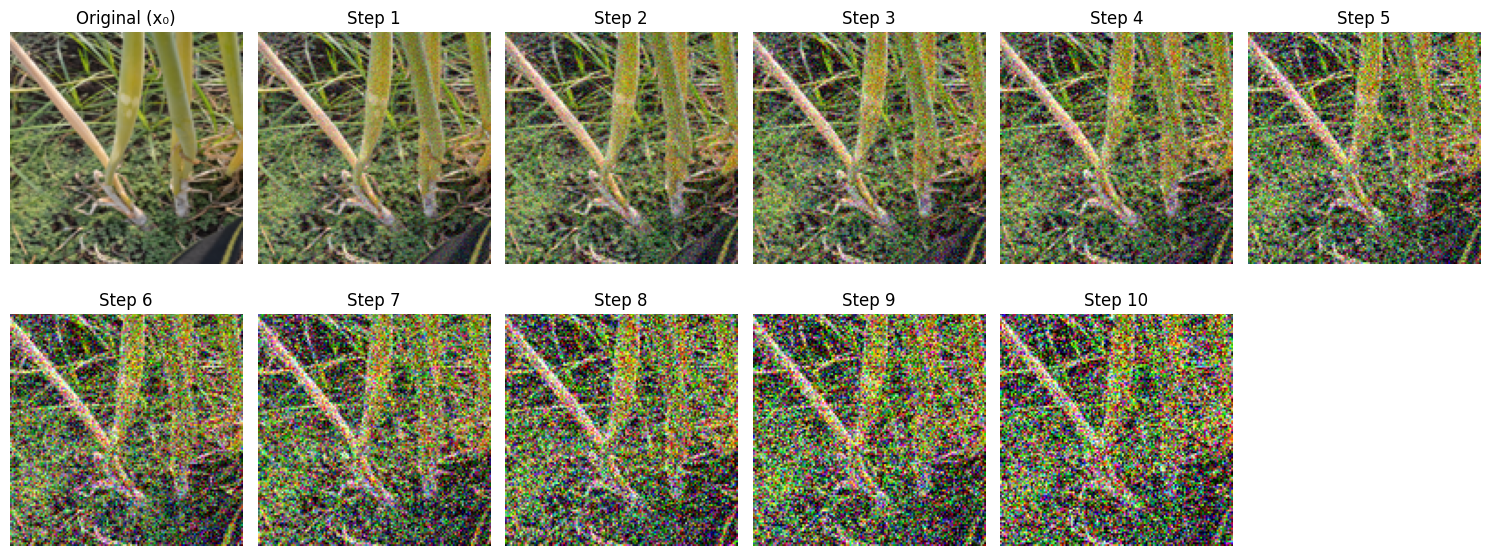

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_image(path, size=(128, 128)):
    img = Image.open(path).convert("RGB")
    img = img.resize(size)
    img_array = np.array(img).astype(np.float32) / 255.0  
    return img_array

def add_noise(x0, t, num_steps):
    beta_start = 0.0001
    beta_end = 0.02
    betas = np.linspace(beta_start, beta_end, num_steps)

    alpha = 1.0 - betas[t]
    alpha_bar = np.prod(1.0 - betas[:t + 1])  

    noise = np.random.randn(*x0.shape)
    xt = np.sqrt(alpha_bar) * x0 + np.sqrt(1 - alpha_bar) * noise
    return xt, noise

def show_images(images, titles, cols=5):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 3 * rows))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(np.clip(img, 0, 1))
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

image_path = "Combined_Files/IYSV/IYSV E5 DSC_0003 APR 18.JPG" 
num_steps = 10

images = [x0]
titles = ["Original (x₀)"]

for t in range(1, num_steps + 1):
    xt, _ = add_noise(x0, t, num_steps+1)
    images.append(xt)
    titles.append(f"Step {t}")

show_images(images, titles, cols=6)
